In [0]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

**** 
Data Processing

In [0]:
boston = load_boston()
features = pd.DataFrame(boston.data,columns = boston.feature_names)


In [0]:
target = pd.DataFrame(boston.target,columns = ['target'])

In [0]:
df = pd.concat([features,target],axis= 1)


Data Visualize

In [5]:
df.describe().round(decimals = 2)  #Describe is used to stastical anylasis of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00



Correlation between attributes & target

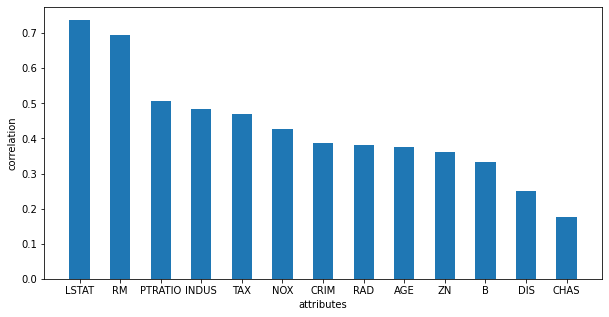

In [6]:
# correlation between the attributs and target
corr = df.corr('pearson')

#taking the absolute value of the correlation
corrs = [abs(corr[attr]['target']) for attr in list(features)]

#make a list of pair [(corr,features)]
l = list(zip(corrs,list(features)))

#sorting the list of pair in descending order
l.sort(key = lambda x:x[0],reverse = True)

#unzip pair to two list
corrs,labels = list(zip((*l)))

#ploting correlation with respect to the target value in a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(10,5))
plt.bar(index,corrs,width=.5)
plt.xlabel('attributes')
plt.ylabel('correlation')
plt.xticks(index, labels)
plt.show()

In [7]:
X = df['LSTAT'].values
Y = df['target'].values
#before normalization
Y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

Normalization of BH Data

In [0]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:,-1]

In [9]:
#after normalization
Y[:5]

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333])

In [0]:
#splitting the data into 80% train data 20% test data
xtrain, xtest, ytrain,ytest =train_test_split(X, Y, test_size =0.2)


In [0]:
def error(m,x,c,t):
    N = x.size
    e = sum(((m*x+c)-t)**2)
    return e*(1/(2*N))

In [0]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m= m-grad_m*learning_rate
    c = c-grad_c*learning_rate
    return m,c


In [0]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e < error_threshold:
            print('Error less than the threshold. Stopping gradient descent')
            break
        error_values.append(e)
        m, c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c, error_values, mc_values

In [14]:
%%time
init_m = .9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001
m,c,error_values,mc_values=gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)

CPU times: user 67.5 ms, sys: 86 µs, total: 67.6 ms
Wall time: 69.7 ms


**Visualization of the learning process**

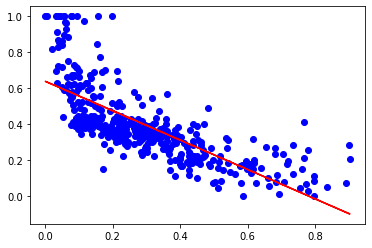

In [15]:
plt.scatter(xtrain,ytrain,color ='b')
plt.plot(xtrain, (m*xtrain+c), color ='r')

**Plotting error values**

Text(0.5, 0, 'Iterations')

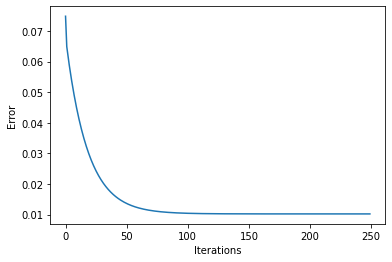

In [16]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

****Animation make take a minute or more to get processed****

In [0]:
#As the number of iterations increasess, changes in the line are less noticable

mc_values_anim = mc_values[0:250:5]

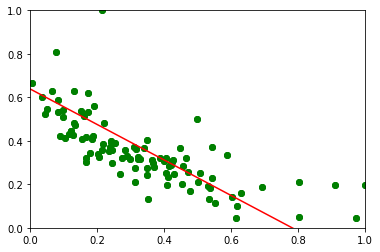

In [18]:
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro-',animated=True)

def init():
  plt.scatter(xtest,ytest, color='g')
  ax.set_xlim(0, 1.0)
  ax.set_ylim(0, 1.0)
  return ln,

def update_frame(frame):
  m, c =mc_values_anim[frame]
  x1, y1 = -0.5, (m*-.5) +c
  x2, y2 = 1.5, (m*1.5) +c  
  ln.set_data([x1, x2], [y1, y2])
  return ln,

anim = FuncAnimation(fig,update_frame, frames =range(len(mc_values_anim)),
                        init_func=init, blit=True)
HTML(anim.to_html5_video())

**Prediction**

In [0]:
#Calculate the predictionson the test set as a vertorized operation
predicted = (m*xtest) +c

In [20]:
#compute MSE for the predicted values on the testing set
mean_squared_error(ytest, predicted)

0.013947661165661407

In [21]:
# Put xtest, ytest and predicted values into a single DataFrame so that we
# can see the predicted values alongside the testing set
p = pd.DataFrame(list(zip(xtest, ytest, predicted)),columns=['x', 'target_y', 'predicted'])
p.head()

,x,target_y,predicted
0,0.613687,0.044444,0.137798
1,0.406733,0.322222,0.306725
2,0.692329,0.186667,0.073606
3,0.387969,0.320000,0.322041
4,0.244205,0.360000,0.439389


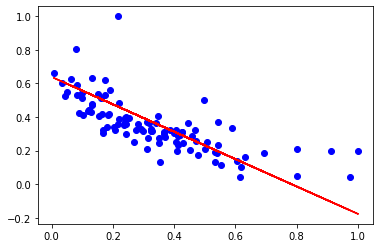

In [22]:
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, predicted, color='r')

# Revert normalization to obtain the predicted proce of the house in $1000s

In [23]:
# Reshape to change the shape to the shape that is requires by the scaler
predicted = predicted.reshape(-1, 1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

# Thi is to remove the extra dimension
xtest_scaled = xtest_scaled[:, -1]
ytest_scaled = ytest_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]

p = pd.DataFrame(list(zip(xtest_scaled,ytest_scaled, predicted_scaled)), columns=['x','target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head()

,x,target_y,predicted_y
0,23.97,7.0,11.20
1,16.47,19.5,18.80
2,26.82,13.4,8.31
3,15.79,19.4,19.49
4,10.58,21.2,24.77
